**REGRESSION: MULTIPLE LINEAR REGRESSION**

*Patricia Pepita - 2602174176*

**Load Library & Data**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('car data.csv',delimiter=",")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**EDA**

In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
for i in df.columns:
  print(df[i].value_counts())

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64
Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64
Present_Price
9.40     14
13.60    13
5.70      8
1.47      7
0.51      6
         ..
36.23     1
18.54     1
7.27      1
15.04     1
12.50     1
Name: count, Length: 148, dtype: int64
Driven_kms
45000    9
15000    9
40000    5
35

In [8]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [9]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [10]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

- Check Null Value for Each Columns

In [11]:
df['Car_Name'].isnull().values.sum()

0

In [12]:
# all features have 0 NA values

**Tidy Up The Data**

**(Feature Engineering: Convert Data Types and Values)**

- Convert Categorical Values to Numeric Values

In [13]:
# (fuel_type, selling_type, transmission)

df['Fuel_Type'].mask(df['Fuel_Type'] == 'Petrol', 0, inplace=True)
df['Fuel_Type'].mask(df['Fuel_Type'] == 'Diesel', 1, inplace=True)
df['Fuel_Type'].mask(df['Fuel_Type'] == 'CNG', 2, inplace=True)

df['Selling_type'].mask(df['Selling_type'] == 'Dealer', 0, inplace=True)
df['Selling_type'].mask(df['Selling_type'] == 'Individual', 1, inplace=True)

df['Transmission'].mask(df['Transmission'] == 'Manual', 0, inplace=True)
df['Transmission'].mask(df['Transmission'] == 'Automatic', 1, inplace=True)


In [14]:
#convert object to integer value

df['Fuel_Type']=df['Fuel_Type'].astype(object).astype(int)
df['Selling_type']=df['Selling_type'].astype(object).astype(int)
df['Transmission']=df['Transmission'].astype(object).astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [16]:
# Drop Columns that I Won't Use

df = df.drop('Car_Name', axis='columns')

In [17]:
df.shape

(301, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Selling_type   301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


**Missing Value Handling**

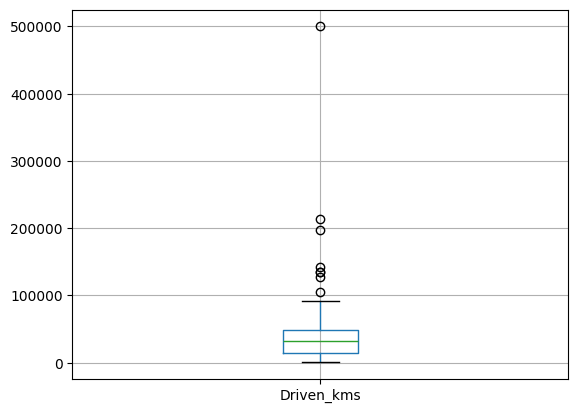

In [19]:
#Check Outliers

import matplotlib.pyplot as plt
boxplot = df.boxplot(column=['Driven_kms']) 
plt.show()

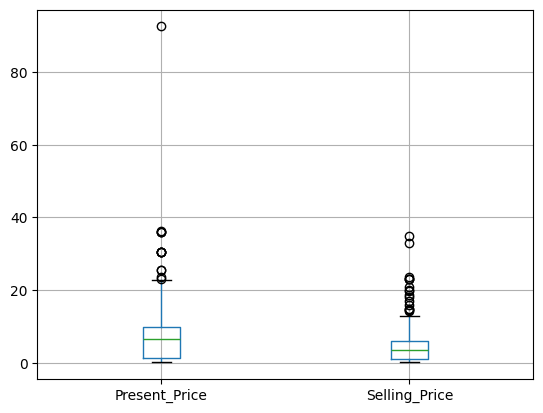

In [20]:
boxplot = df.boxplot(column=['Present_Price','Selling_Price']) 
plt.show()

In [21]:
#Calculate Mean for present proce & selling price & driven kms
print(np.mean(df['Driven_kms']))
print(np.mean(df['Present_Price']))
print(np.mean(df['Selling_Price']))

36947.20598006644
7.628471760797343
4.661295681063123


**Impute Missing Value**

**Impute Missing Value - Numerical Data**

In [31]:
#Impute missing value with mean
''' 
df['Driven_kms'].fillna(36947.2, inplace=True)
df['Present_Price'].fillna(7.6, inplace=True)
df['Selling_Price'].fillna(4.6, inplace=True)
'''

In [32]:
# we can also use median to impute NA value
# df['Driven_kms'].median()

32000.0

In [33]:
#Impute missing value with median
# df['Driven_kms'].fillna(32000, inplace=True)

In [ ]:
# however, since there is no missing value, this wouldn't change a thing

**Impute Missing Value - Categorical Data**

In [34]:
#Find mode of Data Value
import statistics as st

In [35]:
# since there is no categorical data left, I commented the code

# print(st.mode(df['column_name']))

In [36]:
# Impute missing value with mode

# df['column_name'].fillna('mode', inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Selling_type   301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


**Feature Engineering**

In [38]:
# already did the encoding

**Data Modelling**

In [23]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [25]:
input_df=df.drop('Present_Price',axis=1)
output_df=df['Present_Price']

In [26]:
#Split Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df,output_df, test_size=0.2)

In [27]:
#training regression
from sklearn.linear_model import LinearRegression

Linear_Regression = LinearRegression()
Linear_Regression.fit(x_train, y_train)

LinearRegression()

In [28]:
#testing
y_predict=Linear_Regression.predict(x_test)

In [29]:
#calculate error for training and testing
from sklearn import metrics
from sklearn.metrics import r2_score
print("R2: ",r2_score(y_predict,y_test))
print("error_test: ",metrics.mean_absolute_error(y_predict,y_test))

R2:  0.7990650137704676
error_test:  1.7747170584191143


**Model Evaluation & Conclusion**

The multiple linear regression has high R2, which is 79.9% (meaning that the model fits the data in a good way). However, this value could be higher to predit the data better.
Furthermore, it has low error test, which is only 1.77